# Logistic Regression and Classification Error Metrics

In this demo, we'll learn about logistic regression and classification error metrics using a database of spam emails.
Our goal will be to build a model to predict whether a given email is spam. Then, we'll assess the performance of our model using different error metrics.

In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

## Linear regression for binary outcomes

In [2]:
# import the spam data located at
# https://raw.githubusercontent.com/stanford-mse-125/demos/main/data/spambase.tsv
# Data description: https://archive.ics.uci.edu/ml/datasets/spambase

spam = pd.read_csv('https://raw.githubusercontent.com/stanford-mse-125/demos/main/data/spambase.tsv', sep='\t')
spam.head()

,make,address,all,num3d,our,over,remove,internet,order,mail,...,char_semicolon,char_left_paren,char_left_bracket,char_exclamation,char_dollar,char_pound,capital_avg,capital_long,capital_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
print(spam.columns)

Index(['make', 'address', 'all', 'num3d', 'our', 'over', 'remove', 'internet',
       'order', 'mail', 'receive', 'will', 'people', 'report', 'addresses',
       'free', 'business', 'email', 'you', 'credit', 'your', 'font', 'num000',
       'money', 'hp', 'hpl', 'george', 'num650', 'lab', 'labs', 'telnet',
       'num857', 'data', 'num415', 'num85', 'technology', 'num1999', 'parts',
       'pm', 'direct', 'cs', 'meeting', 'original', 'project', 're', 'edu',
       'table', 'conference', 'char_semicolon', 'char_left_paren',
       'char_left_bracket', 'char_exclamation', 'char_dollar', 'char_pound',
       'capital_avg', 'capital_long', 'capital_total', 'is_spam'],
      dtype='object')


In [4]:
# 1: email is spam
# 0: email is not spam
spam['is_spam'].value_counts()

0    2788
1    1813
Name: is_spam, dtype: int64

<AxesSubplot: xlabel='money', ylabel='Count'>

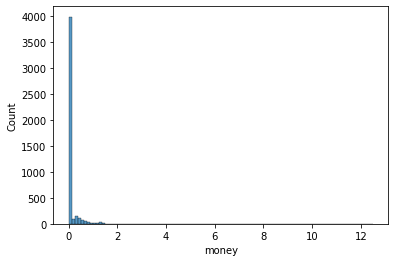

In [5]:
# let's look at the 'money' feature: many spam contain the word 'money'!
sns.histplot(spam['money'], bins=100)

In [6]:
# 0% to 12.5% of the words in each of the 4601 emails is "money"
print(spam['money'].head())
spam['money'].describe()

0    0.00
1    0.43
2    0.06
3    0.00
4    0.00
Name: money, dtype: float64


count    4601.000000
mean        0.094269
std         0.442636
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        12.500000
Name: money, dtype: float64

In [7]:
# Linear regression can be used to predict a 0/1 outcome.
# This is called a linear probability model (LPM)
# We will predict whether an email is spam using the following features:
# 1. char_dollar: % of characters in the email that are '$'
# 2. credit: % of words in the email that are 'credit'
# 3. money: % of words in the email that are 'money'
# 4. re: % of words in the email that are 're' (as in the subject line 're: hello')
formula = 'is_spam ~ 1 + char_dollar + credit + money + re'
model = smf.ols(formula=formula, data=spam).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                is_spam   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     250.3
Date:                Tue, 09 May 2023   Prob (F-statistic):          8.51e-195
Time:                        21:54:59   Log-Likelihood:                -2780.3
No. Observations:                4601   AIC:                             5571.
Df Residuals:                    4596   BIC:                             5603.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.3346      0.007     45.696      0.000       0.320       0.349
char_dollar     0.5855      0.027     21.889      0.000       0.533       0.638
credit          0.1575      0.013     12.255      0.000       0.132       0.183
money           0.1879      0.015     12.635      0.000       0.159       0.217
re             -0.0536      0.006     -8.271      0.000      -0.066      -0.041
==============================================================================
Omnibus:                       65.831   Durbin-Watson:                   0.352
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.350
Skew:                           0.277   Prob(JB):                     3.91e-15
Kurtosis:                       2.804   Cond. No.                         4.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# predict output (where not spam=0 and spam=1) for each email using LPM
pred = model.predict(spam)
pred.head()

0    0.334591
1    0.520799
2    0.500795
3    0.334591
4    0.334591
dtype: float64

In [9]:
# Some predictions of LPM are less than 0 or greater than 1.
# Linear regression doesn't constrain our predictions to
# the range of the outcome variable.
# Linear regression outputs can take on any value (-Inf,+Inf)
pred.describe()

count    4601.000000
mean        0.394045
std         0.206687
min        -0.812540
25%         0.334591
50%         0.334591
75%         0.395442
max         3.849409
dtype: float64

## Logistic regression

In [10]:
# Odds are the ratio of the probability of an event to its complement.
def prob_to_odds(p):
  return(p/(1-p))

# Even odds (1:1)
print(prob_to_odds(0.5))

# 2:1 odds
print(prob_to_odds(2/3))

# 9:1 odds
print(prob_to_odds(0.9))

# 999:1 odds
print(prob_to_odds(0.999))

1.0
1.9999999999999998
9.000000000000002
998.9999999999991


/var/folders/n2/zz0rp47n1z17rjyncsh3xstr0000gn/T/ipykernel_62465/827190083.py:3: RuntimeWarning: divide by zero encountered in true_divide
  return(p/(1-p))


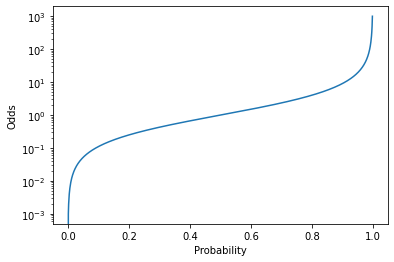

In [34]:
# odds map the [0,1] probability scale to the [0,+Inf) odds scale
p_range = np.linspace(0,1,1000)
odds_range = prob_to_odds(p_range)
plt.plot(p_range, odds_range)
plt.xlabel("Probability")
plt.ylabel("Odds")
plt.yscale("log") 
plt.show()

In [12]:
# Odds can be converted back to probabilities
def odds_to_prob(odds):
  return(odds/(1+odds))

print(odds_to_prob(1))
print(odds_to_prob(2))
print(odds_to_prob(9))
print(odds_to_prob(999))

0.5
0.6666666666666666
0.9
0.999


In [13]:
# check that we converted back to probabilities correctly
print(odds_to_prob(prob_to_odds(0.7)))

0.7


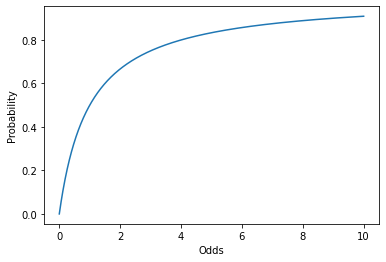

In [37]:
# inverse odds maps the [0,+Inf) odds scale to the [0,1] probability scale
odds_range = np.linspace(0, 10, 1000)
p_range = odds_to_prob(odds_range)
plt.plot(odds_range, p_range)
plt.xlabel("Odds")
plt.ylabel("Probability")
plt.show()

/var/folders/n2/zz0rp47n1z17rjyncsh3xstr0000gn/T/ipykernel_62465/827190083.py:3: RuntimeWarning: divide by zero encountered in true_divide
  return(p/(1-p))
/var/folders/n2/zz0rp47n1z17rjyncsh3xstr0000gn/T/ipykernel_62465/1016180617.py:5: RuntimeWarning: divide by zero encountered in log
  return(np.log(prob_to_odds(p)))


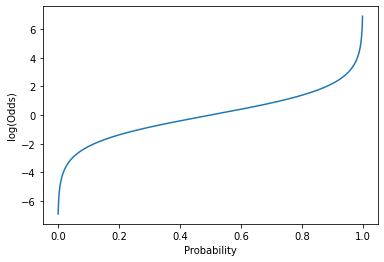

In [38]:
# log maps [0,+Inf) to (-Inf, +Inf)
# So, log-odds maps [0,1] probability to [0,+Inf] odds to (-Inf, +Inf) log odds
# log-odds <--> logit
def logit(p):
  return(np.log(prob_to_odds(p)))

p_range = np.linspace(0, 1, 1000)
log_odds_range = logit(p_range)
plt.plot(p_range, log_odds_range)
plt.xlabel("Probability")
plt.ylabel("log(Odds)")
plt.show()

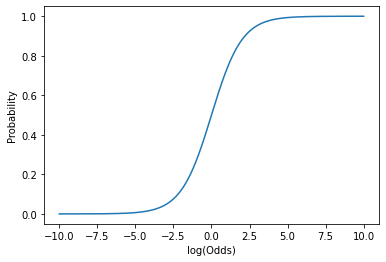

In [40]:
# inv_logit maps a linear combination [-Inf, +Inf] to [0,1] probability space
# inverse log-odds <--> inverse logit <--> expit
def inv_logit(log_odds):
  return(np.exp(log_odds)/(1+np.exp(log_odds)))

log_odds_range = np.linspace(-10, 10, 1000)
p_range = inv_logit(log_odds_range)
plt.plot(log_odds_range, p_range)
plt.xlabel("log(Odds)")
plt.ylabel("Probability")
plt.show()

## Maximum likelihood estimation

In [17]:
# fit logistic regression model via maximum likelihood estimation
# Unlike linear regression, logistic regression 
# does not have a closed-form solution.
print(formula)
model = smf.logit(formula=formula, data=spam).fit()
model.summary()

is_spam ~ 1 + char_dollar + credit + money + re
Optimization terminated successfully.
         Current function value: 0.481178
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                is_spam   No. Observations:                 4601
Model:                          Logit   Df Residuals:                     4596
Method:                           MLE   Df Model:                            4
Date:                Tue, 09 May 2023   Pseudo R-squ.:                  0.2824
Time:                        21:55:01   Log-Likelihood:                -2213.9
converged:                       True   LL-Null:                       -3085.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.0666      0.043    -24.680      0.000      -1.151      -0.982
char_dollar    11.8176      0.605     19.549      0.000      10.633      13.002
credit          2.3119      0.343      6.741      0.000       1.640       2.984
money           1.9933      0.248      8.022      0.000       1.506       2.480
re             -0.7755      0.099     -7.805      0.000      -0.970      -0.581
===============================================================================
"""

## Interpreting regression coefficients

In [18]:
# Coefficients are additive log odds ratios
# '1pp more "money" words in email associated with
# increase of +2 in log odds that email is spam'
model.params

Intercept      -1.066563
char_dollar    11.817567
credit          2.311898
money           1.993280
re             -0.775505
dtype: float64

In [19]:
# Exponentiated coefs are multiplicative odds ratios
# Easier to interpret
# '1pp more "money" words in email associated with
# 7.4x increase in odds that email is spam'
np.exp(model.params)

Intercept           0.344190
char_dollar    135613.881439
credit             10.093568
money               7.339570
re                  0.460471
dtype: float64

## Model predictions

In [20]:
# predict probability of spam for each email
# using logistic regression model
pred = model.predict(spam)
pred.head()

0    0.256057
1    0.871883
2    0.872221
3    0.256057
4    0.256057
dtype: float64

In [21]:
# all predictions now in [0,1], unlike linear probability model
pred.describe()

count    4.601000e+03
mean     3.940448e-01
std      2.827280e-01
min      2.101836e-08
25%      2.560573e-01
50%      2.560573e-01
75%      5.073430e-01
max      1.000000e+00
dtype: float64

## Model inspection & evaluation

## Calibration

In [22]:
# What fraction of emails with X% predicted probability of spam are actually spam? 

# Add a column to the spam data frame with the predictions.
# Add an additional column with the predictions rounded to 1 decimal place.
spam['pred'] = pred
spam['rounded_pred'] = np.round(pred, 1)

spam[['pred', 'rounded_pred', 'is_spam']].head()

,pred,rounded_pred,is_spam
0,0.256057,0.3,1
1,0.871883,0.9,1
2,0.872221,0.9,1
3,0.256057,0.3,1
4,0.256057,0.3,1


Text(0, 0.5, 'Observed spam proportion')

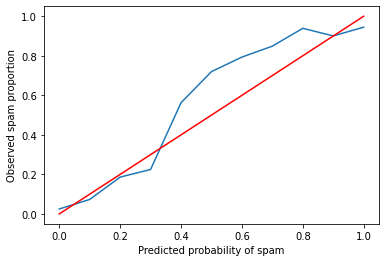

In [43]:
# Plot the proportion of emails that are spam within each bin
# Include a line to indicate average pred = observed proportion
# The parity line indicates perfect calibration, Pr(spam|pred)=pred
spam.groupby('rounded_pred')['is_spam'].mean().plot()
plt.plot([0,1], [0,1], color='red')
plt.xlabel("Predicted probability of spam")
plt.ylabel("Observed spam proportion")

## Accuracy

In [24]:
# How often are our predictions correct?
# Assume pred > 0.5 means a prediction of spam (common default)
np.mean(spam['is_spam'] == (spam['pred'] > 0.5))

0.8072158226472506

In [25]:
# Spam emails are less common than not spam emails
# If we ignore the model and always predict not spam, how well do we do?
# The frequency of the most common class is the accuracy in this case.
np.mean(spam['is_spam'] == 0)

0.6059552271245382

## Precision

In [26]:
# What proportion of emails labeled as spam are actually spam?
# For now, assume pred > 0.5 means a prediction of spam
np.mean(spam['is_spam'][spam['pred'] > 0.5])

0.901213171577123

## Recall/sensitivity

In [27]:
# Of all the emails that are actually spam, what fraction did we predict as spam (i.e., what fraction did we "recall")?
# For now, assume pred > 0.5 means a prediction of spam
np.mean(spam['pred'][spam['is_spam'] == 1] > 0.5)

0.573634859349145

## Specificity

In [28]:
# Of all the emails that are not spam, what fraction did we predict as not spam?
# For now, assume pred > 0.5 means a prediction of spam
np.mean(spam['pred'][spam['is_spam'] == 0] <= 0.5)

0.9591104734576757

## Selecting the threshold

In [29]:
# How do accuracy, precision, sensitivity, and specifity change
# under different thresholds?
# Generate dataframe of accuracy, precision, sensitivity, and specificity
# of the model under different thresholds

def accuracy(threshold):
    return(np.mean(spam['is_spam'] == (spam['pred'] > threshold)))

def precision(threshold):
    return(np.mean(spam['is_spam'][spam['pred'] > threshold]))

def sensitivity(threshold):
    return(np.mean(spam['pred'][spam['is_spam'] == 1] > threshold))

def specificity(threshold):
    return(np.mean(spam['pred'][spam['is_spam'] == 0] <= threshold))

thresholds = np.linspace(0, 1, 5)
results = pd.DataFrame(columns=['threshold', 'accuracy', 'precision', 'sensitivity', 'specificity'])
for threshold in thresholds:
    results = results.append({'threshold': threshold,
                              'accuracy': accuracy(threshold),
                              'precision': precision(threshold),
                              'sensitivity': sensitivity(threshold),
                              'specificity': specificity(threshold)},
                              ignore_index=True)
    
results



/var/folders/n2/zz0rp47n1z17rjyncsh3xstr0000gn/T/ipykernel_62465/1902976098.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'threshold': threshold,
/var/folders/n2/zz0rp47n1z17rjyncsh3xstr0000gn/T/ipykernel_62465/1902976098.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'threshold': threshold,
/var/folders/n2/zz0rp47n1z17rjyncsh3xstr0000gn/T/ipykernel_62465/1902976098.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'threshold': threshold,
/var/folders/n2/zz0rp47n1z17rjyncsh3xstr0000gn/T/ipykernel_62465/1902976098.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

,threshold,accuracy,precision,sensitivity,specificity
0,0.0,0.394045,0.394045,1.0,0.0
1,0.25,0.52945,0.453291,0.942085,0.261119
2,0.5,0.807216,0.901213,0.573635,0.95911
3,0.75,0.76592,0.932941,0.437397,0.979555
4,1.0,0.605955,NaN,0.0,1.0


## Receiving Operating Characteristics (ROC) Curve

Text(0, 0.5, 'True Positive Rate')

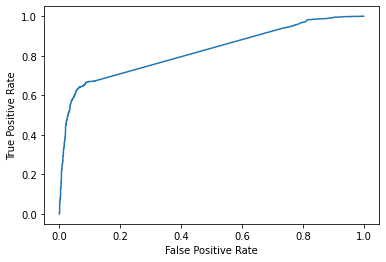

In [41]:
# Calculate FPR and TPR sweeping through a range of thresholds
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(spam['is_spam'], spam['pred'])
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

## Area Under the ROC Curve (AUC)

In [31]:
# AUC is the area under the ROC curve
# AUC is a threshold-agnostic classification metric
from sklearn.metrics import auc
auc(fpr, tpr)

0.8230103841140938